<h1>Simple Linear Regression</h1>


In [350]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Use to make nice 3D graphs
%precision %.2f

'%.2f'

<b>Generate random input data to train on</b>

In [351]:
observationSize = 1000
xs = np.random.uniform(low=-10,high=10,size=(observationSize,1))
zs = np.random.uniform(low=-10,high=10,size=(observationSize,1))


In [352]:
inputs = np.column_stack((xs,zs))
print(np.round(inputs,2))
print(inputs.shape)

[[-0.31 -0.16]
 [-2.87  2.32]
 [ 0.93  7.37]
 ...
 [-8.41  4.53]
 [-3.71 -9.21]
 [-8.31  4.38]]
(1000, 2)


<b>Create targets to aim at</b>
***
<b>Our dummy function: </b>
$$f(x,y)=8x - 9z + 5 + noise$$

In [353]:
noise = np.random.uniform(-1,1,(observationSize,1))


targets = 8*xs - 9*zs + 5 + noise


In [354]:
print(np.round(targets,2))

[[ 4.3500e+00]
 [-3.9500e+01]
 [-5.3540e+01]
 [-1.1730e+02]
 [-1.1584e+02]
 [-7.2610e+01]
 [-6.5210e+01]
 [ 3.0400e+01]
 [-6.6000e+00]
 [ 2.6960e+01]
 [-2.7000e+00]
 [ 5.7600e+01]
 [ 6.2800e+00]
 [ 3.1920e+01]
 [ 1.9370e+01]
 [-4.5400e+00]
 [-5.5760e+01]
 [ 4.7110e+01]
 [ 1.8580e+01]
 [-2.6140e+01]
 [-6.6490e+01]
 [-7.8160e+01]
 [-2.7410e+01]
 [ 1.0143e+02]
 [-1.0650e+01]
 [-4.3320e+01]
 [ 1.4140e+01]
 [ 2.0410e+01]
 [ 7.9470e+01]
 [ 6.8500e+01]
 [ 1.5817e+02]
 [-1.2634e+02]
 [ 8.4980e+01]
 [-1.4780e+01]
 [ 4.6530e+01]
 [ 8.4060e+01]
 [ 7.0960e+01]
 [ 4.1250e+01]
 [ 2.0110e+01]
 [ 2.8350e+01]
 [-8.2810e+01]
 [ 7.6800e+00]
 [-1.2750e+02]
 [ 4.4450e+01]
 [-3.7620e+01]
 [ 6.3570e+01]
 [ 5.1660e+01]
 [-5.1560e+01]
 [ 2.4540e+01]
 [-5.9140e+01]
 [ 6.2600e+01]
 [-3.9430e+01]
 [-3.1050e+01]
 [-1.3079e+02]
 [-6.9400e+01]
 [ 4.0690e+01]
 [ 3.0670e+01]
 [-8.9810e+01]
 [-7.1950e+01]
 [ 6.0810e+01]
 [ 2.6030e+01]
 [ 8.8360e+01]
 [-4.7420e+01]
 [-2.7800e+01]
 [-1.3570e+01]
 [-5.2140e+01]
 [ 1.5308e

<b>Plotting the data</b>

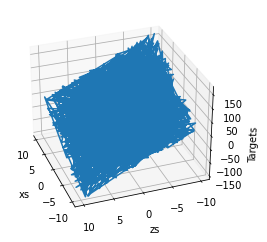

In [355]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs.reshape(observationSize,),zs.reshape(observationSize,),targets.reshape(observationSize,))
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=160)
plt.show()

<b>Learning Rate</b>

In [356]:
learning_rate= 0.00001

<b>Initialize variables : </b>

In [357]:
#Initial weights and biases will be picked randomly from the interval [-0.1,0.1]
init_range = 9

weights = np.random.uniform(-init_range,init_range,size=(2,1))

biases = np.random.uniform(-init_range,init_range,size=1)

print(weights)
print(biases)

[[ 2.79821228]
 [-0.8544044 ]]
[-1.67243981]


<b>Train the model</b>
___

Note: $$\frac{L2 Norm Loss}{2} = \frac{(y_{i} - t_{i})^2}{2}$$ 
* Dividing By 2 does not change the nature of the loss function, this is done so the derivative of expression looks simplier. This simple format is used in the code below.

In [358]:
for i in range(1000):
    predicted_outputs = np.dot(inputs,weights) + biases
    delta = predicted_outputs - targets
    
    #Mean/ Average loss
    #L2 norm Loss / 2 was our neat format
    loss = (delta ** 2).sum() / 2 / observationSize
    
    print(loss)
    
    weights = weights - learning_rate * np.dot(inputs.T,delta)
    biases = biases - learning_rate * delta.sum()
#     print(weights)


1559.6930182995488
716.3554668055955
335.26034153374286
162.87178850143758
84.74809734436101
49.21564430199743
32.935027180611485
25.361309706711886
21.72875513802466
19.88285061288072
18.849262021386124
18.187205532784546
17.69717874519505
17.288821166463023
16.921155430779653
16.5755548067003
16.24351162096231
15.921101362995815
15.606476573362045
15.298732042899184
14.99739082943541
14.702171395237105
14.412882071218306
14.129373203415518
13.851515436717701
13.579189844683503
13.312283429622179
13.05068705792677
12.794294500174965
12.54300197275112
12.29670790742237
12.055312824781293
11.818719255256527
11.586831682139659
11.359556495025293
11.136801948389873
10.918478122906876
10.704496888400188
10.49477186792846
10.289218402763181
10.087753518144684
9.890295889756166
9.696765810881457
9.507085160223603
9.321177370367042
9.138967396868711
8.960381687964535
8.785348154878982
8.613796142725175
8.44565640198395
8.280861060550215
8.119343596335371
7.961038810414713
7.805882800708804
7.

0.1606299648793409
0.1606287200495891
0.16062749998024042
0.16062630417879603
0.16062513216255217
0.16062398345840784
0.16062285760267098
0.16062175414087357
0.1606206726275867
0.16061961262624116
0.16061857370895216
0.16061755545634526
0.16061655745738726
0.1606155793092214
0.16061462061700346
0.16061368099374312
0.1606127600601477
0.16061185744446807
0.16061097278235076
0.16061010571668838
0.16060925589747677
0.160608422981674
0.16060760663306167
0.16060680652210765
0.16060602232583587
0.1606052537276938
0.16060450041742513
0.16060376209094487
0.16060303845021748
0.16060232920313336
0.16060163406339525
0.1606009527503996
0.16060028498912385
0.16059963051001624
0.1605989890488874
0.16059836034680092
0.1605977441499725
0.16059714020966503
0.1605965482820889
0.16059596812830385
0.16059539951412216
0.16059484221001427
0.16059429599101588
0.16059376063663808
0.16059323593077668
0.16059272166162647
0.16059221762159523
0.16059172360721943
0.1605912394190832
0.16059076486173626
0.16059029974

<b>Check weights and biases</b>

In [359]:
print(weights)
print(biases)

[[ 8.002654  ]
 [-9.00218379]]
[5.01229126]


<b>Plot last outputs and targets</b>

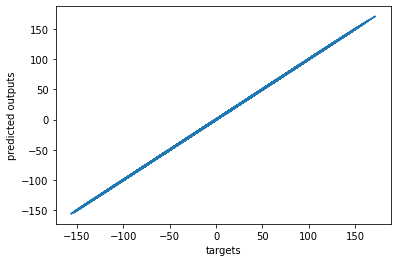

In [360]:
plt.plot(targets,predicted_outputs)
plt.xlabel('targets')
plt.ylabel('predicted outputs')
plt.show()